In [2]:
import warnings
warnings.filterwarnings('ignore')

Here are the US News World & Report Rankings from 2013:

### Cracking US New & World Reports College Rankings

<img src="images/life is linear.png" style="width: 1000px;"/>

Let's recall how we can use the linalg package do so basic linear algebra operations:

In [1]:
import numpy as np
from scipy import linalg

P=np.matrix([[1,0,2],[2,0,0],[0,1,2]])
Q=np.matrix([[1],[2],[3]])
print(P*Q)

A=np.matrix([[3,0],[8,-1]])

#inverse:
print(linalg.inv(A))

#determinant:
print(linalg.det(A))

#solving Ax=b:
b = np.matrix([[1],[2]])
print(linalg.solve(A, b))

#eigenvalues:
print(linalg.eigvals(A))

#eigenvalues and eigenvectors:
print(linalg.eig(A))

#least squares
A=np.matrix([[1,1],[1,2],[1,3]])
b=np.matrix([[1],[2],[2]])
X=linalg.inv(A.T*A)*A.T*b
print(X)
print(A*X)


[[7]
 [2]
 [8]]
[[ 3.33333333e-01  6.93889390e-18]
 [ 2.66666667e+00 -1.00000000e+00]]
-3.0
[[0.33333333]
 [0.66666667]]
[-1.+0.j  3.+0.j]
(array([-1.+0.j,  3.+0.j]), array([[0.        , 0.4472136 ],
       [1.        , 0.89442719]]))
[[0.66666667]
 [0.5       ]]
[[1.16666667]
 [1.66666667]
 [2.16666667]]


Let's perform least squares to find the weightings of US News World & Reports:

In [3]:
import numpy as np
from scipy import linalg

categories = ['Reputation',
             'Selectivity rank (lower = better)',
             'SAT',
             '% in Top 10 of HS',
             'Acceptance rate',
             'Fac Resources Rank (lower = better)',
             '% classes fewer than 20 students',
             'Percentage classes greater than 50 students (lower = better)',
             'Fac Student Ratio (lower = better)',
             '% full time faculty',
             'Graduation Retention rank (lower = better)',
              'Freshmen retention',
             'Financial resources rank (lower = better)',
             'Alumni Giving rank']

collegedata=np.genfromtxt('data/collegedata.csv',delimiter=',', encoding=None, dtype=None)
college=[]

#create matrices of correct size
A=np.zeros((len(collegedata),14))
B=np.zeros((len(collegedata),1))

for i in range(len(collegedata)):
    college.append(collegedata[i][0]) #list of colleges is the first column
    B[i][0]=collegedata[i][1] # list of rankings is the second column

#populate the rest of the college data in matrix A
for j in range(14):
    for i in range(len(collegedata)):
        A[i][j]=collegedata[i][j+2]

A=np.matrix(A)
B=np.matrix(B)   

#normalize A using feature scaling: (it's worse in this case though)
#for j in range(14):
#    A[:,j] = (A[:,j]-min(A[:,j]))/(max(A[:,j])-min(A[:,j]))

#normalize by dividing by the max in each column
for j in range(14):
    A[:,j] = A[:,j]/max(A[:,j])

#use linear least squares to find weights of each variable        
X=linalg.inv(A.T*A)*(A.T)*B

print('weights for each variable \n')

tuples = []
for i in range(len(categories)):
    tuples.append((round(X[i][0,0], 3), categories[i]))
tuples.sort(reverse = True)

for i in range(len(categories)):
    print(tuples[i])

#print colby's stuff
print(college[17], 'info \n', A[17][:])
projection = A[17][:]*X
print('predicted ranking:', projection[0,0])
print('colby actual ranking:', B[17,0])

#print error
error = 0
for i in range(len(collegedata)):
    projection = A[i][:]*X
    newerror = abs(projection[0,0] - B[i,0])
    error = error + newerror
print('Average Absolute Prediction Error:', error/len(collegedata))


weights for each variable 

(46.534, 'Freshmen retention')
(40.851, 'Reputation')
(9.095, 'Alumni Giving rank')
(7.928, '% in Top 10 of HS')
(2.108, 'Selectivity rank (lower = better)')
(2.1, '% classes fewer than 20 students')
(0.676, 'Fac Student Ratio (lower = better)')
(0.071, 'Percentage classes greater than 50 students (lower = better)')
(-1.356, 'Acceptance rate')
(-2.253, '% full time faculty')
(-3.209, 'Graduation Retention rank (lower = better)')
(-3.322, 'SAT')
(-4.105, 'Financial resources rank (lower = better)')
(-4.142, 'Fac Resources Rank (lower = better)')
colby info 
 [[0.88043478 0.54347826 0.89       0.64210526 0.63043478 0.41666667
  0.80232558 0.4        0.90909091 0.93939394 0.29787234 0.96938776
  0.70731707 0.70689655]]
predicted ranking: 84.5551721288459
colby actual ranking: 84.0
Average Absolute Prediction Error: 0.4953938650745931


We see that freshmen retention was the highest positive contributing factor. Reputation had the second highest which is kind of wacky as it was just college administrators subjectively ranking each other. Acceptance rate had the largest negative contribution (the higher the acceptance rate the lower the US News World & Report Rankings) which is also shady because it encourages colleges to encourage the most amount of people to apply only to reject them.

### Image Compression (SVD Decomposition)

size of matrix 113 220
rank= 113


Text(0.5, 1.0, 'rank=20')

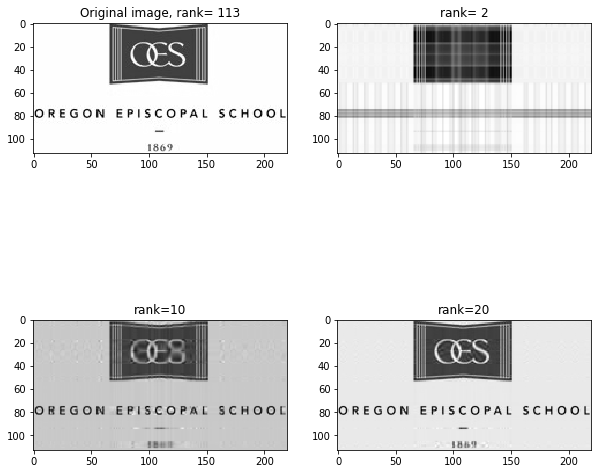

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#convert image to grayscale so we are only dealing
#  with an mxn gray matrix instead of an mxnx3 RGB matrix
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('images/OES.png')
gray = rgb2gray(img)
print('size of matrix',len(gray),len(gray[0]))
rank=min(len(gray),len(gray[0]))
print('rank=',rank)

plt.rcParams['figure.figsize'] = 10,10
plt.figure(1)
plt.subplot(221)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.title('Original image, rank= %s'%rank)

#SVD to compress the image to rank1
rank1=2
LA = np.linalg
a = np.array(gray)

U, s, Vh = LA.svd(a, full_matrices=False)
assert np.allclose(a, np.dot(U, np.dot(np.diag(s), Vh)))

s[rank1:] = 0
new_a = np.dot(U, np.dot(np.diag(s), Vh))

plt.subplot(222)
plt.imshow(new_a, cmap = plt.get_cmap('gray'))
plt.title('rank= %s'%rank1)


#SVD to compress the image to rank2
rank2=10
U2, s2, Vh2 = LA.svd(a, full_matrices=False)
assert np.allclose(a, np.dot(U2, np.dot(np.diag(s2), Vh2)))

s2[rank2:] = 0
new_a2 = np.dot(U2, np.dot(np.diag(s2), Vh2))


plt.subplot(223)
plt.imshow(new_a2, cmap = plt.get_cmap('gray'))
plt.title('rank=%s'%rank2)


#SVD to compress the image to rank3
rank3=20
U3, s3, Vh3 = LA.svd(a, full_matrices=False)
assert np.allclose(a, np.dot(U3, np.dot(np.diag(s3), Vh3)))

s3[rank3:] = 0
new_a3 = np.dot(U3, np.dot(np.diag(s3), Vh3))


plt.subplot(224)
plt.imshow(new_a3, cmap = plt.get_cmap('gray'))
plt.title('rank=%s'%rank3)


### Calculating similar movies

In [5]:
#this program uses the movielens ratings data set
##and inserts a rating of 0 if a user didn't rate a movie

import numpy as np

#smaller data set:
moviedata=np.genfromtxt('data/smallermovieset.csv',delimiter=',',dtype=int)

#original data set:
###


movielist=moviedata[:,0]
userlist=moviedata[:,1]
ratinglist=moviedata[:,2]


moviemin=np.amin(moviedata,axis=0)[0]
moviemax=np.amax(moviedata,axis=0)[0]
usermin=np.amin(moviedata,axis=0)[1]
usermax=np.amax(moviedata,axis=0)[1]

unique=np.unique(movielist)

for i in unique:
    print(i)
    for j in range(usermin,usermax+1):
        inside=False
        for ratings in range(1,6):
            if True in np.all(moviedata==np.array((i,j,ratings)),axis=1):
                inside = True
        if inside == False:
            moviedata=np.vstack([moviedata,np.array((i,j,0))])


updatedmoviedata=np.sort(moviedata.view('i8,i8,i8'), order=['f0'], axis=0).view(np.int)
print(updatedmoviedata)
np.savetxt("data/updatedmoviedata.csv", updatedmoviedata, delimiter=",",fmt='%d')


50
99
168
172
174
181
182
187
404
418
501
693
[[ 50   1   5]
 [ 50   2   5]
 [ 50   3   0]
 ...
 [693 941   0]
 [693 942   0]
 [693 943   0]]


In [7]:
import numpy as np
#make keys for movie names corresponding to movie number

num_to_movie_key={}
movie_to_num_key={}
movie_indices = []

with open('data/movienamekey.csv', 'r') as f:
    for i, line in enumerate(f):
        num, name = int(line.split(',')[0]),  line.split(',')[1].strip()
        num_to_movie_key[num]=name
        movie_to_num_key[name] = num
        movie_indices.append(num)
        
print(num_to_movie_key)

print(movie_to_num_key)


{50: 'star_wars', 99: 'snow_white', 168: 'monty_python', 172: 'empire_strikes_back', 174: 'raiders_of_the_lost_ark', 181: 'return_of_the_jedi', 182: 'goodfellas', 187: 'godfather', 404: 'pinocchio', 418: 'cinderella', 501: 'dumbo', 693: 'casino'}
{'star_wars': 50, 'snow_white': 99, 'monty_python': 168, 'empire_strikes_back': 172, 'raiders_of_the_lost_ark': 174, 'return_of_the_jedi': 181, 'goodfellas': 182, 'godfather': 187, 'pinocchio': 404, 'cinderella': 418, 'dumbo': 501, 'casino': 693}


In [8]:
##put large movie data matrix into smaller arrays corresponding to each movie
import pandas as pd
moviedata=pd.read_csv('data/updatedmoviedata.csv', header = None)
moviedata = moviedata.rename(columns = {0:'movie', 1: 'user', 2: 'rating'})
movies = np.unique(moviedata['movie'])
num_of_users=int(len(moviedata)/len(movies))
movie_matrix=np.zeros((num_of_users,len(movies)))
i=0
j=0
for k in range(len(moviedata)):
    if k > 1 and k % num_of_users == 0:
        i=0
        j=j+1
    movie_matrix[i,j]=moviedata['rating'][k]
    i=i+1


In [6]:
##ask user for which movie they want to find similar movies to
n=input('What movie would you like to find similar ones to? ')

####calculate norms
normlist=[]
for j in range(movie_matrix.shape[1]):
    mysum = 0
    norm=0
    for i in range(movie_matrix.shape[0]):
        mysum=mysum+(movie_matrix[i,movie_indices.index(movie_to_num_key[n])]-movie_matrix[i,j])**2
        norm=np.sqrt(mysum)
    normlist.append((norm,j))
    
##print most similar movies
def getKey(item):
    return item[0]

sortedmovies=sorted(normlist,key=getKey)

print('movies closest to',num_to_movie_key[movie_to_num_key[n]], 'are:' )

for i in range(len(sortedmovies)):
    print(sortedmovies[i][0],num_to_movie_key[movie_indices[sortedmovies[i][1]]])



What movie would you like to find similar ones to? star_wars
movies closest to star_wars are:
0.0 star_wars
50.39841267341661 return_of_the_jedi
69.50539547402057 raiders_of_the_lost_ark
71.06335201775947 empire_strikes_back
83.01807032206904 monty_python
91.35644476444998 goodfellas
93.03762679690406 godfather
93.2148056909416 snow_white
96.46242791885346 cinderella
97.57561170702442 dumbo
98.93432164825309 pinocchio
100.7620960480676 casino
